In [7]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.manifold import TSNE

In [2]:
dirname = '/home/yainoue/meg2image/results/20230429_sbj01_eegnet_cv_norm_regression/features'

In [9]:
split = 'train'
Ys = np.load(os.path.join(dirname, f'y_{split}.npy'))
Ls = np.load(os.path.join(dirname, f'l_{split}.npy'))
Zs = np.load(os.path.join(dirname, f'z_{split}.npy'))
# sort 
sort_indices = np.argsort(Ls)
Ys = Ys[sort_indices,:]
Zs = Zs[sort_indices,:]
Ls = Ls[sort_indices]

In [26]:
def tsne_and_draw(X):
    embeddings = TSNE(n_components=2, learning_rate = 'auto', init='random', perplexity=100).fit_transform(X)
    print(embeddings.shape)
    plt.scatter(*embeddings.T, c=Ls,s=2)
    plt.show()

(6000, 2)


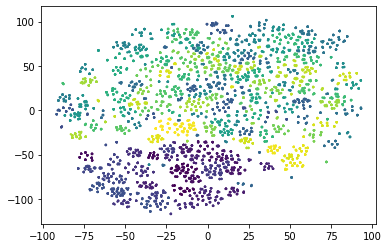

In [27]:
tsne_and_draw(Ys)

(6000, 2)


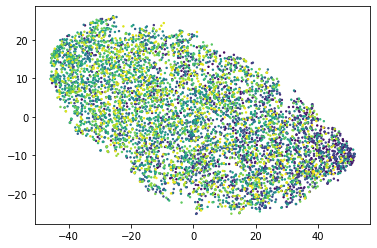

In [25]:
tsne_and_draw(Zs)

(6000, 2)


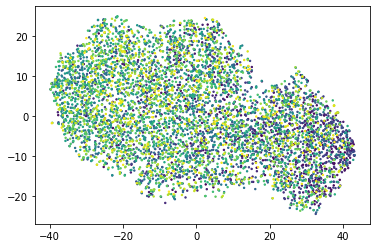

In [29]:
normalized_Zs = Zs - np.mean(Zs, axis=0, keepdims=True)
normalized_Zs = normalized_Zs / np.std(Zs, axis=0, keepdims=True)
tsne_and_draw(normalized_Zs)